In [21]:
from scapy.all import *
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
for cell_id in range(1,101):
    print(f"Cell ID: {cell_id}")
    count=0
    for i in range(29):
        i_str='0'*(3-len(str(i)))+str(i)
        cell_id_str='0'*(3-len(str(cell_id)))+str(cell_id)
        try:
            scapy_cap = rdpcap('data/cell-'+cell_id_str+'_'+i_str+'.pcap')
        except:
            print(f"File {'data/cell-'+cell_id_str+'_'+i_str+'.pcap'} is not found. Skipping to the next cell...")
        count=0
        # print(len(scapy_cap))
        for packet in scapy_cap:
            if "Raw" in packet and "IP" in packet:
                count+=1
    count/=(i+1)
    print(f"Average number of raw packets: {count}")

Cell ID: 1
Average number of raw packets: 5.827586206896552
Cell ID: 2
File data/cell-002_009.pcap is not found. Skipping to the next cell...
Average number of raw packets: 5.310344827586207
Cell ID: 3
Average number of raw packets: 7.758620689655173
Cell ID: 4
Average number of raw packets: 2.0344827586206895
Cell ID: 5
Average number of raw packets: 7.275862068965517
Cell ID: 6
Average number of raw packets: 5.103448275862069
Cell ID: 7
Average number of raw packets: 6.724137931034483
Cell ID: 8
Average number of raw packets: 8.931034482758621
Cell ID: 9
Average number of raw packets: 6.379310344827586
Cell ID: 10
Average number of raw packets: 2.8620689655172415
Cell ID: 11
Average number of raw packets: 9.413793103448276
Cell ID: 12
Average number of raw packets: 6.137931034482759
Cell ID: 13
Average number of raw packets: 9.862068965517242
Cell ID: 14
Average number of raw packets: 7.0344827586206895
Cell ID: 15
Average number of raw packets: 11.10344827586207
Cell ID: 16
Average 

In [10]:
for cell_id in range(1,101):
    print(f"Cell ID: {cell_id}")
    for i in range(29):
        count_incoming=0
        count_outgoing=0
        i_str='0'*(3-len(str(i)))+str(i)
        cell_id_str='0'*(3-len(str(cell_id)))+str(cell_id)
        try:
            scapy_cap = rdpcap('data/cell-'+cell_id_str+'_'+i_str+'.pcap')
        except:
            print(f"File {'data/cell-'+cell_id_str+'_'+i_str+'.pcap'} is not found. Skipping to the next cell...")
        for packet in scapy_cap:
            if Raw in packet and IP in packet:
                if packet[IP].src=="172.18.0.2":
                    count_outgoing+=1
                elif packet[IP].dst=="172.18.0.2":
                    count_incoming+=1
                print(f"Number of bytes: {len(packet[Raw])}")
        print(f"Sample: {i}\n#Incoming: {count_incoming}\n#Outgoing: {count_outgoing}")
        time.sleep(1)

Cell ID: 1
Number of bytes: 536
Number of bytes: 2812
Number of bytes: 1258
Number of bytes: 1114
Number of bytes: 1564
Number of bytes: 536
Number of bytes: 536
Number of bytes: 536
Number of bytes: 3620
Number of bytes: 2812
Number of bytes: 830
Number of bytes: 8436
Number of bytes: 4218
Number of bytes: 2812
Number of bytes: 86
Number of bytes: 11248
Number of bytes: 1050
Number of bytes: 4218
Number of bytes: 1092
Number of bytes: 4218
Number of bytes: 474
Number of bytes: 2812
Number of bytes: 808
Number of bytes: 4218
Number of bytes: 988
Number of bytes: 536
Number of bytes: 2812
Number of bytes: 4218
Number of bytes: 210
Number of bytes: 536
Number of bytes: 536
Number of bytes: 536
Number of bytes: 4070
Number of bytes: 2812
Number of bytes: 4218
Number of bytes: 810
Number of bytes: 4070
Number of bytes: 5624
Number of bytes: 1406
Number of bytes: 536
Number of bytes: 1406
Number of bytes: 2812
Number of bytes: 1240
Number of bytes: 536
Number of bytes: 4070
Number of bytes:

Number of bytes: 2812
Number of bytes: 536
Number of bytes: 1102
Number of bytes: 2812
Number of bytes: 1406
Number of bytes: 1406
Number of bytes: 610
Number of bytes: 2812
Number of bytes: 4218
Number of bytes: 1260
Number of bytes: 2812
Number of bytes: 2812
Number of bytes: 4218
Number of bytes: 536
Number of bytes: 2812
Number of bytes: 2812
Number of bytes: 86
Number of bytes: 2812
Number of bytes: 294
Number of bytes: 1406
Number of bytes: 4218
Number of bytes: 2812
Number of bytes: 368
Number of bytes: 1406
Number of bytes: 4218
Number of bytes: 536
Number of bytes: 588
Number of bytes: 1406
Number of bytes: 2812
Number of bytes: 536
Number of bytes: 988
Number of bytes: 536
Number of bytes: 536
Number of bytes: 536
Number of bytes: 3620
Number of bytes: 536
Number of bytes: 3620
Number of bytes: 536
Number of bytes: 2812
Number of bytes: 1344
Number of bytes: 2812
Number of bytes: 808
Number of bytes: 2812
Number of bytes: 1406
Number of bytes: 4218
Number of bytes: 1406
Numbe

KeyboardInterrupt: 

In [22]:
port_set_s=set()
port_set_d=set()
packet_sizes=list()
for cell_id in range(1,101):
    print(f"Cell ID: {cell_id}")
    for i in range(29):
        count_incoming=0
        count_outgoing=0
        i_str='0'*(3-len(str(i)))+str(i)
        cell_id_str='0'*(3-len(str(cell_id)))+str(cell_id)
        try:
            scapy_cap = rdpcap('data/cell-'+cell_id_str+'_'+i_str+'.pcap')
        except:
            print(f"File {'data/cell-'+cell_id_str+'_'+i_str+'.pcap'} is not found. Skipping to the next cell...")
            break
        for packet in scapy_cap:
            if Raw in packet and IP in packet and TCP in packet:
                port_set_s.add(packet[TCP].sport)
                port_set_d.add(packet[TCP].dport)
                packet_sizes.append(len(packet[Raw]))
print(port_set_s)
print(port_set_d)

Cell ID: 1
Cell ID: 2
Cell ID: 3
Cell ID: 4
Cell ID: 5
Cell ID: 6
Cell ID: 7
Cell ID: 8
Cell ID: 9
Cell ID: 10
Cell ID: 11
Cell ID: 12
Cell ID: 13
Cell ID: 14
Cell ID: 15
Cell ID: 16
Cell ID: 17
Cell ID: 18
Cell ID: 19
Cell ID: 20
Cell ID: 21
Cell ID: 22
Cell ID: 23
Cell ID: 24
Cell ID: 25
Cell ID: 26
Cell ID: 27
Cell ID: 28
Cell ID: 29
Cell ID: 30
Cell ID: 31
Cell ID: 32
Cell ID: 33
Cell ID: 34
Cell ID: 35
Cell ID: 36
Cell ID: 37
Cell ID: 38
Cell ID: 39
Cell ID: 40
Cell ID: 41
Cell ID: 42
Cell ID: 43
Cell ID: 44
Cell ID: 45
Cell ID: 46
Cell ID: 47
Cell ID: 48
Cell ID: 49
Cell ID: 50
Cell ID: 51
Cell ID: 52
File data/cell-052_028.pcap is not found. Skipping to the next cell...
Cell ID: 53
Cell ID: 54
Cell ID: 55
Cell ID: 56
Cell ID: 57
Cell ID: 58
Cell ID: 59
Cell ID: 60
Cell ID: 61
Cell ID: 62
Cell ID: 63
Cell ID: 64
Cell ID: 65
Cell ID: 66
Cell ID: 67
Cell ID: 68
Cell ID: 69
Cell ID: 70
Cell ID: 71
Cell ID: 72
Cell ID: 73
Cell ID: 74
File data/cell-074_028.pcap is not found. Skipping

63270
2
2332.3641685794464
1406.0
4218.0


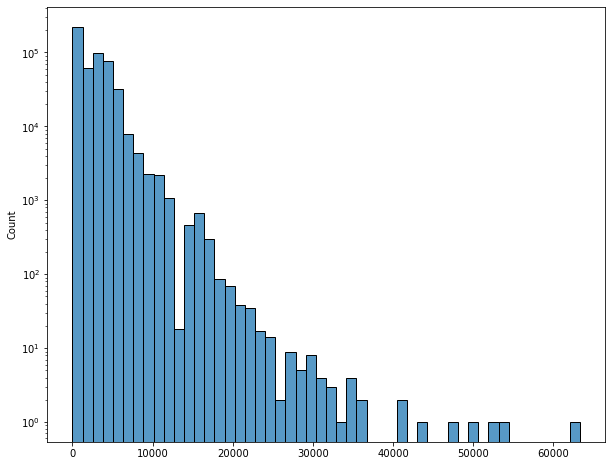

In [40]:
print(np.max(packet_sizes))
print(np.min(packet_sizes))
print(np.mean(packet_sizes))
print(np.median(packet_sizes))
print(np.quantile(packet_sizes,0.85))
plt.figure(figsize=(10,8))
sns.histplot(packet_sizes,bins=50)
plt.yscale("log")